In [16]:
!pip install pandas
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 8.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 3.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 3.9 MB/s eta 0:00:004.2 MB/s eta 0:00:01


In [32]:
!pip install matplotlib

In [9]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')

In [14]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [100]:
#find the number of rows in each column where the record is null
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Cluster                   0
dtype: int64

In [101]:
#create a duplicate dataset with relevant features, Age, Annual Income and Spending Score
X = df.iloc[:, 2:]
X

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,0
1,21,15,81,4
2,20,16,6,0
3,23,16,77,4
4,31,17,40,0
...,...,...,...,...
195,35,120,79,2
196,45,126,28,3
197,32,126,74,2
198,32,137,18,3


In [33]:
import matplotlib.pyplot as plt

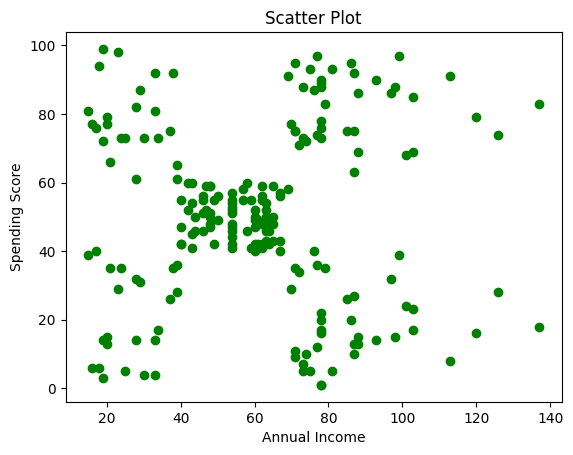

In [38]:
#scatter plot of annual income against spending score to visualize patterns
plt.scatter(X.iloc[:,1], X.iloc[:,2], color='green', marker='o')
plt.title('Scatter Plot')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [81]:
#elbow method to find the optimal value of k
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, n_init=10, max_iter=300, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

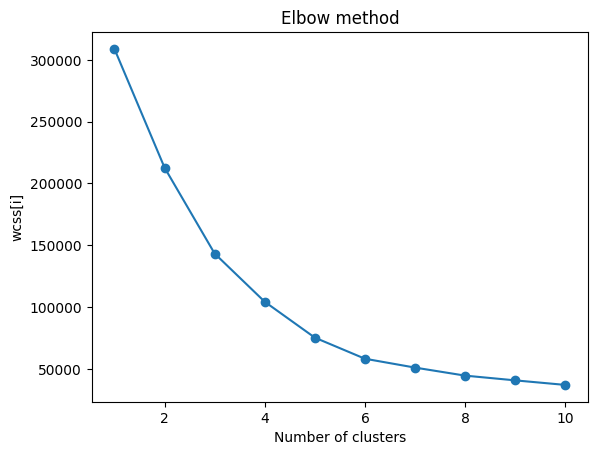

In [102]:
#plot wcss (within cluster sum of squares) for each value of k
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss[i]')
plt.show()

In [103]:
#optimal value is where the 'elbow' starts to bend, in this case could be 5 or 6
kmeans = KMeans(n_clusters = 5, init='k-means++', max_iter=100, n_init=10, random_state=42)
kmeans.fit(X)
print("Centroids:\n", kmeans.cluster_centers_)

Centroids:
 [[4.52173913e+01 2.63043478e+01 2.09130435e+01 8.88178420e-16]
 [4.30886076e+01 5.52911392e+01 4.95696203e+01 1.00000000e+00]
 [3.26923077e+01 8.65384615e+01 8.21282051e+01 2.00000000e+00]
 [4.06666667e+01 8.77500000e+01 1.75833333e+01 3.00000000e+00]
 [2.55217391e+01 2.63043478e+01 7.85652174e+01 4.00000000e+00]]


In [104]:
#add a column named 'Cluster' in our dataframe
df['Cluster']=kmeans.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


In [105]:
#print the summary for each cluster to understand the distribution of data
for cluster in range(5):
    print(f'Cluster {cluster} summary:')
    print(df[df['Cluster']==cluster].describe())
    print('\n')

Cluster 0 summary:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count    23.00000  23.000000           23.000000               23.000000   
mean     23.00000  45.217391           26.304348               20.913043   
std      13.56466  13.228607            7.893811               13.017167   
min       1.00000  19.000000           15.000000                3.000000   
25%      12.00000  35.500000           19.500000                9.500000   
50%      23.00000  46.000000           25.000000               17.000000   
75%      34.00000  53.500000           33.000000               33.500000   
max      45.00000  67.000000           39.000000               40.000000   

       Cluster  
count     23.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  


Cluster 1 summary:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   79.000000  79.000000           79.0000

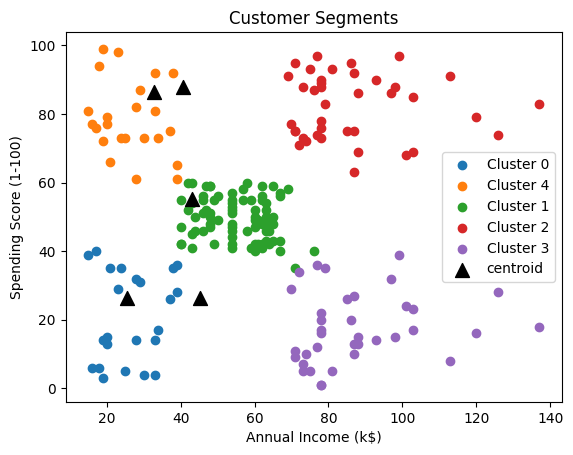

In [109]:
#plot the dataframes within each cluster and the centroid of each cluster
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data.iloc[:, 3], 
                cluster_data.iloc[:,4], 
                label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
              s = 100, c = "black", label = "centroid", marker = '^')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


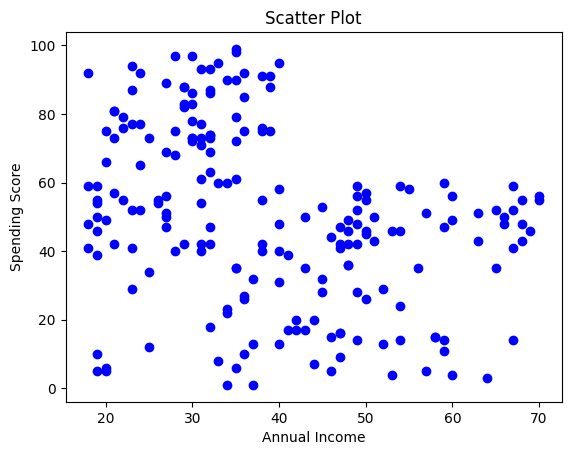

In [110]:
#lets try plot of Age against spending score
plt.scatter(X['Age'], X['Spending Score (1-100)'], color='blue', marker='o')
plt.title('Scatter Plot')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

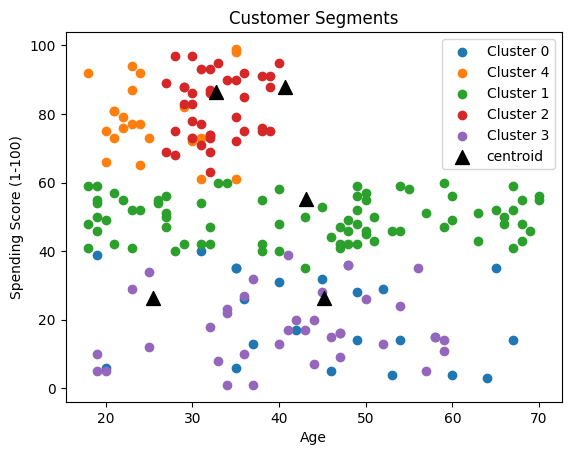

In [111]:
#clustering in respect to age of customers and spending score
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], 
                cluster_data['Spending Score (1-100)'], 
                label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
              s = 100, c = "black", label = "centroid", marker = '^')
plt.title('Customer Segments')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()